In [21]:
import pandas as pd

import joblib
model = joblib.load("modelo.pkl")
print(type(model))

user_data = {
    "Age": int(input("Enter Age: ")),
    "Experience": int(input("Enter Experience (in years): ")),
    "Income": float(input("Enter Monthly Income (in thousands): ")),
    "Family": int(input("Enter Family Size (1 to 4): ")),
    "CCAvg": float(input("Enter Avg Credit Card Spend per month (in thousands): ")),
    "Education": int(input("Enter Education Level (1: Undergrad, 2: Graduate, 3: Advanced/Professional): ")),
    "Mortgage": float(input("Enter Mortgage (in thousands): ")),
    "Securities Account": int(input("Do you have a Securities Account? (0 = No, 1 = Yes): ")),
    "CD Account": int(input("Do you have a Certificate of Deposit Account? (0 = No, 1 = Yes): ")),
    "Online": int(input("Do you use Online Banking? (0 = No, 1 = Yes): ")),
    "CreditCard": int(input("Do you have a Credit Card? (0 = No, 1 = Yes): "))
}


# Convert user input to DataFrame
input_df = pd.DataFrame([user_data])

# Make prediction
prediction = model.predict(input_df)


print("\nPersonal Loan Prediction:", " Yes" if prediction[0] == 1 else " No")

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


Enter Age:  1
Enter Experience (in years):  1
Enter Monthly Income (in thousands):  100
Enter Family Size (1 to 4):  4
Enter Avg Credit Card Spend per month (in thousands):  0
Enter Education Level (1: Undergrad, 2: Graduate, 3: Advanced/Professional):  1
Enter Mortgage (in thousands):  0
Do you have a Securities Account? (0 = No, 1 = Yes):  0
Do you have a Certificate of Deposit Account? (0 = No, 1 = Yes):  0
Do you use Online Banking? (0 = No, 1 = Yes):  0
Do you have a Credit Card? (0 = No, 1 = Yes):  0



Personal Loan Prediction:  Yes


In [5]:
pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import joblib
import pandas as pd

# Load your trained model
model = joblib.load("bank_loan_model2.pkl")

print("=== Personal Loan Application ===\n")

# Take user input
age = int(input("Enter Age: "))
experience = int(input("Enter Experience (in years): "))
income = int(input("Enter Monthly Income (in thousands): "))
family_size = int(input("Enter Family Size (1 to 4): "))
credit_spend = int(input("Enter Avg Credit Card Spend per month (in thousands): "))
education = int(input("Enter Education Level (1: Undergrad, 2: Graduate, 3: Advanced/Professional): "))
mortgage = int(input("Enter Mortgage (in thousands): "))
securities = int(input("Do you have a Securities Account? (0 = No, 1 = Yes): "))
certificate = int(input("Do you have a Certificate of Deposit Account? (0 = No, 1 = Yes): "))
online = int(input("Do you use Online Banking? (0 = No, 1 = Yes): "))
credit_card = int(input("Do you have a Credit Card? (0 = No, 1 = Yes): "))

# Create input dataframe
user_data = {
    "Age": age,
    "Experience": experience,
    "Income": income,
    "Family": family_size,
    "CCAvg": credit_spend,
    "Education": education,
    "Mortgage": mortgage,
    "SecuritiesAccount": securities,
    "CDAccount": certificate,
    "Online": online,
    "CreditCard": credit_card
}
input_df = pd.DataFrame([user_data])

# Make prediction
prediction = model.predict(input_df)
print("\nPersonal Loan Prediction:", "✅ Yes" if prediction == 1 else "❌ No")

# Reasons for rejection
if prediction == 0:
    reasons = []
    if income < 100:  
        reasons.append("Monthly income is below the required threshold.")
    if credit_spend < 5:  
        reasons.append("Low average monthly credit card spend indicates limited credit activity.")
    if education == 1:  
        reasons.append("Applicant has only an undergraduate education.")
    if not securities:  
        reasons.append("No securities account found.")
    if not certificate:  
        reasons.append("No certificate of deposit account found.")
    if not online:  
        reasons.append("Not using online banking services.")
    if not credit_card:  
        reasons.append("No credit card usage detected.")
    if experience < 2:  
        reasons.append("Insufficient work experience.")

    print("\nReasons for Rejection:")
    for r in reasons:
        print("-", r)


=== Personal Loan Application ===



Enter Age:  25
Enter Experience (in years):  2
Enter Monthly Income (in thousands):  20
Enter Family Size (1 to 4):  4
Enter Avg Credit Card Spend per month (in thousands):  200
Enter Education Level (1: Undergrad, 2: Graduate, 3: Advanced/Professional):  2
Enter Mortgage (in thousands):  1
Do you have a Securities Account? (0 = No, 1 = Yes):  0
Do you have a Certificate of Deposit Account? (0 = No, 1 = Yes):  0
Do you use Online Banking? (0 = No, 1 = Yes):  0
Do you have a Credit Card? (0 = No, 1 = Yes):  0


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# 1. Import Libraries

In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# 2.Load Dataset

In [4]:
df = pd.read_csv('bank_loan.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


# 3. Data Cleaning and Preprocessing

## Convert CCAvg column to a float

In [5]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype('float64')

## Convert negative Experience values to positive

In [6]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.50,1443.52,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.34,11.46,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.10,11.47,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.77,46.03,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.50,2121.85,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.40,1.15,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0


In [7]:
df.loc[df['Experience'] < 0, 'Experience'] = df.loc[df['Experience'] < 0, 'Experience'].abs()

# 4. Drop unnecessary columns

In [8]:
df['ZIP Code'].nunique()

468

In [9]:
df['ID'].nunique()

5000

In [10]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

# 5. Convert Income from annual to monthly

In [11]:
df['Income'] = round(df['Income'] / 12, 2)

# 6. Define features (x) and target (y)

In [12]:
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# 7. Train the Random Forest Classifier model

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# 8. Make predictions on the test set

In [15]:
y_pred = model.predict(x_test)


# 9. Evaluate the model and print the accuracy

In [16]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Random Forest model: {accuracy:.4f}")

Accuracy of the Random Forest model: 0.9910


# 10.Save this model

In [18]:
import pickle
# Save the trained model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [20]:
import pickle
import numpy as np
import pandas as pd

# Load saved model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Assuming you still have x_test from train_test_split
y_pred = model.predict(x_test)

# 1️⃣ Prediction distribution
unique, counts = np.unique(y_pred, return_counts=True)
pred_distribution = dict(zip(unique, counts))
print("Prediction distribution:", pred_distribution)

# 2️⃣ Feature importance distribution
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
print("\nFeature Importance Distribution:")
print(feature_importances.sort_values(ascending=False))


Prediction distribution: {np.int64(0): np.int64(907), np.int64(1): np.int64(93)}

Feature Importance Distribution:
Income                0.339949
Education             0.191931
CCAvg                 0.167285
Family                0.110233
CD Account            0.057215
Experience            0.039920
Age                   0.037717
Mortgage              0.034971
CreditCard            0.008645
Online                0.007139
Securities Account    0.004996
dtype: float64


In [24]:
df = pd.read_csv('bank_loan.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


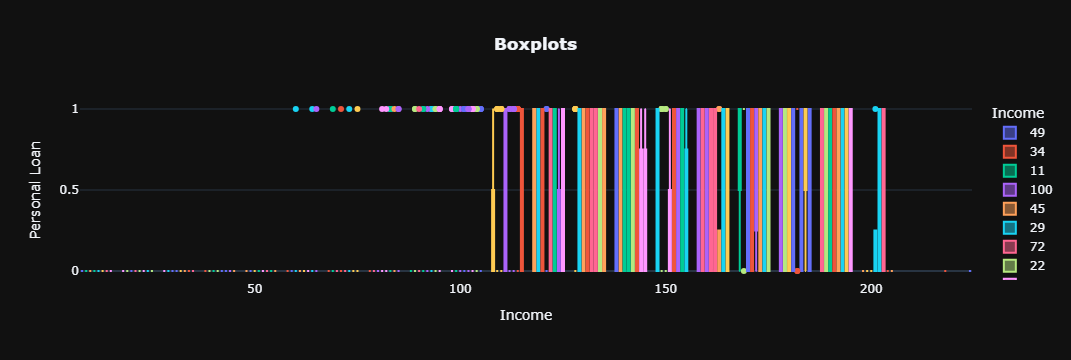

In [26]:
import plotly.express as px

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]
fig = px.box(df, x="Income", y="Personal Loan", template='plotly_dark', title='<b>Boxplots', color='Income')
fig.update_layout(title_x=0.5)
fig.show()